In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import torch
sns.set()

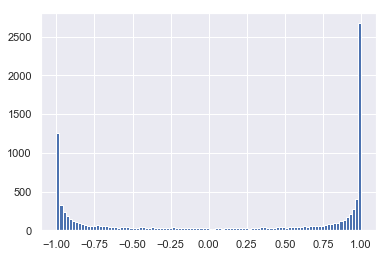

In [12]:
path = "dataframe_v0_mc.dat"

dat = pd.read_pickle(path)

# print(dat.head())
# for col in dat.columns: 
#     print(col) 

traindat = dat[["cosTheta","trueKs"]]

plt.hist(dat["cosTheta"],100)
plt.show()


In [73]:
import torch

s_batch = 1

torch_tensor = torch.tensor(traindat.values)

trainset = torch_tensor[:int(len(torch_tensor)*0.8)]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=s_batch,shuffle=True, num_workers=2)

testset = torch_tensor[int(len(torch_tensor)*0.2):]
testloader = torch.utils.data.DataLoader(testset, batch_size=s_batch,shuffle=False, num_workers=2)

classes = ("background","v0")

dataiter = iter(trainloader)
dd = dataiter.next()

datashow, labels = dd[:,0],dd[:,1]
print(' '.join('%5s' % float(datashow[j]) for j in range(s_batch)))
print(' '.join('%5s' % classes[int(labels[j])] for j in range(s_batch)))

0.9997400045394897
   v0


In [71]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
